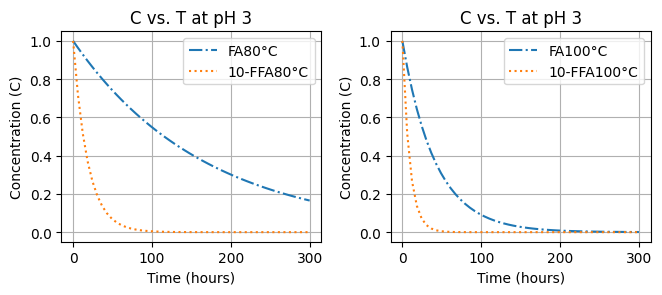

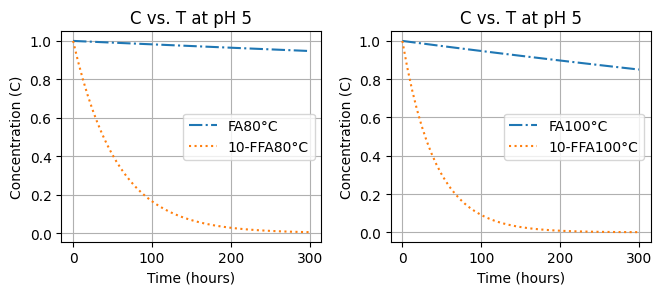

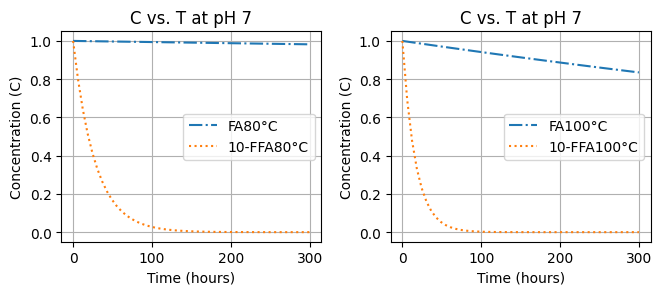

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the function to calculate concentration at time t
def concentration(t, C0, k):
    return C0 * np.exp(-k * t)

# Define the time range in hours
t_values = np.linspace(0, 300 )  # Adjust the time range as needed (e.g., from 0 to 5 hours)

# Define the initial concentration
C0 = 1.0  # Initial concentration, adjust as needed


folic_acid_rate_constants = {
    3: {80: 1e-4, 100: 4e-4}, 
    5: {80: 3e-6 , 100: 9e-6}, 
    7: {80: 1e-6 , 100: 1e-5 },  
}

formyl_folic_acid_rate_constants = {
    3: {80: 9e-4 , 100: 1.8e-3 },  
    5: {80: 3e-4 , 100: 4e-4 },    
    7: {80: 6e-4, 100: 1e-3},    
}

# Plot concentration versus time for each pH and temperature
for ph, temp_k_values in folic_acid_rate_constants.items():
    plt.figure(figsize=(10, 8))
    i = 1  # Subplot index
    for temp, k in temp_k_values.items():
        # Plot  data for Folic acid
        folic_acid_k = folic_acid_rate_constants[ph][temp]
        folic_acid_Ct = concentration(t_values, C0, folic_acid_k * 60)
        plt.subplot(3, 3, i)
        plt.plot(t_values, folic_acid_Ct, label=f'FA{temp}°C', linestyle='-.')

        # Plot additional data for 10-Formyl folic acid
        formyl_folic_acid_k = formyl_folic_acid_rate_constants[ph][temp]
        formyl_folic_acid_Ct = concentration(t_values, C0, formyl_folic_acid_k*60)
        plt.plot(t_values, formyl_folic_acid_Ct, label=f'10-FFA{temp}°C', linestyle=':')
        
        plt.xlabel('Time (hours)')  # Adjust the x-axis label
        plt.ylabel('Concentration (C)')
        plt.title(f'C vs. T at pH {ph}')
        plt.legend()
        plt.grid(True)
        i += 1
    plt.tight_layout()
    plt.show()
